<a href="https://colab.research.google.com/github/thisisanuragn/ANURAG-N/blob/main/Anuragn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset into the Python environment

In [4]:
titanic = pd.read_csv("/content/titanic_dataset.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Make ‘PassengerId’ as the index column

In [5]:
titanic.set_index('PassengerId', inplace=True)



3. Check the basic details of the dataset

In [6]:
print(titanic.head())
print(titanic.info())
print(titanic.describe())


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

4. Fill in all the missing values present in all the columns in the dataset

In [13]:
# Check for missing values
print(titanic.isnull().sum())

# Fill missing values
# For 'Age', fill with the median age
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

# For 'Embarked', replace by the mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# For 'Cabin'
titanic['Cabin'].fillna('Unknown', inplace=True)


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


5. Check and handle outliers in at least 3 columns in the dataset

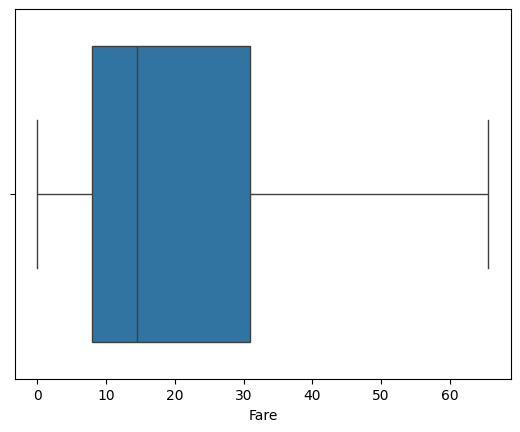

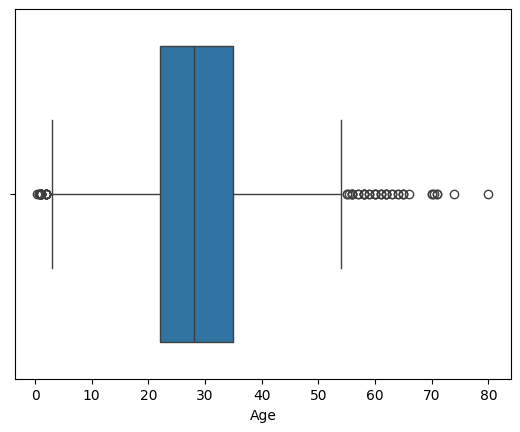

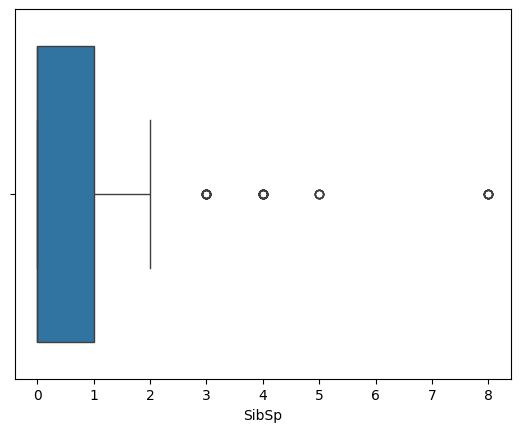

In [14]:
# Visualize outliers using boxplots
sns.boxplot(x=titanic['Fare'])
plt.show()

# Handling outliers in 'Fare' using IQR
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
titanic['Fare'] = titanic['Fare'].clip(lower=lower_bound, upper=upper_bound)

# Check other numeric columns similarly (e.g., 'Age', 'SibSp')
sns.boxplot(x=titanic['Age'])
plt.show()

sns.boxplot(x=titanic['SibSp'])
plt.show()


6. Do min-max scaling on the feature set (Take ‘Survived’ as target)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Define features and target
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Selecting numerical columns for scaling
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Scaling
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Check scaled features
print(X.head())


             Pclass                                               Name  \
PassengerId                                                              
1               1.0                            Braund, Mr. Owen Harris   
2               0.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3               1.0                             Heikkinen, Miss. Laina   
4               0.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
5               1.0                           Allen, Mr. William Henry   

                Sex       Age  SibSp  Parch            Ticket      Fare  \
PassengerId                                                               
1              male  0.271174  0.125    0.0         A/5 21171  0.110460   
2            female  0.472229  0.125    0.0          PC 17599  1.000000   
3            female  0.321438  0.000    0.0  STON/O2. 3101282  0.120745   
4            female  0.434531  0.125    0.0            113803  0.809027   
5              male  0.434531  